Реализовать алгоритм мажоритарного декодирования для кода Рида-
Маллера.

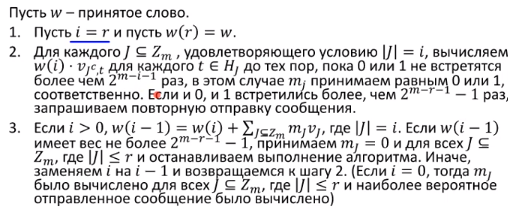

In [ ]:
import numpy as np
import itertools
import functools
from random import randint

r = int(input())
m = int(input())

# 1 task
I = []
digits = []
for k in range(m):
  digits.append(k)

k = 0
for i in range(1, r + 1, 1):
  I += list(itertools.combinations(digits, i))[::-1]
  k += len(I[i - 1])

print(I)

K = []
for i in range(2**m):
  binary_code = str(bin(i)[2:])
  while len(binary_code) < m:
    binary_code = '0' + binary_code
  binary_code_reverse=''
  for i in range(len(binary_code)-1,-1,-1):
    binary_code_reverse += binary_code[i]
  K.append(binary_code_reverse)
print(K)

G = []

flag = 1
res = np.ones(2**m, dtype = int)
G.append(np.matrix.copy(res))

for i in I:
  index = 0
  for k in K:
    for n in i:
      if int(k[n]) == 1:
        flag = 0
    res[index] = flag
    index += 1
    flag = 1
  G.append(np.matrix.copy(res))

G = np.array(G)
print(G)


# 2 task
def majority_decoding(word_err, word):
  flag_error = 0

  dict_m_2 = dict.fromkeys(I)
  dict_m = {None : None}
  dict_m.update(dict_m_2)

  for i in range(r, 0, -1):
    J = list(filter(lambda sub: len(sub) == i, I))
    for j in J:
      j_comp = list(filter(lambda sub: sub not in j, digits))
      H_J = []

      # generating H_J
      for k in K:
        flag = True
        for l in j:
          if k[l] == '1':
            flag = False
            break
        if flag:
          H_J.append(k)
        flag = True
      #print("H_j", H_J, "j", j)

      # generating U_jcomp_t
      u = []
      u_arr = np.zeros(2**m, dtype=int)
      num = 0
      for t in H_J:
        for k in K:
          flag = True
          for l in j_comp:
            if int(t[l]) ^ int(k[l]) == 1:
              flag = False
          if flag:
            u_arr[num] = 1
          flag = True
          num += 1
        u.append(u_arr)
        u_arr = np.zeros(2**m, dtype=int)
        num = 0
      u = np.array(u)
      #print("u", u)

      #w(i) * U_jcomp_t
      num_zeros = 0
      for u_arr in u:
        #print("u_arr", u_arr)
        if np.sum(np.multiply(u_arr, word_err))%2 == 0:
          #print("here")
          num_zeros += 1
      if num_zeros == len(u) / 2:
        flag_error = 1
        break
      elif num_zeros > len(u) / 2:
        dict_m[j] = 0
      else:
        dict_m[j] = 1
      #print("still here")

    if flag_error:
      break
    #print("dict_m", dict_m.items())

    # if len(j_nums) > len(G) / 2:
    #   print("error")
    #   break

    j_nums = [k for k, v in dict_m.items() if (len(k) == i if k != None else False) and v == 1]
    i_num = 1
    for i_I in I:
      if i_I in j_nums:
        word_err = word_err ^ G[i_num]
        #print("word_err", word_err, "i_num", i_num)
      i_num += 1

  if flag_error:
    print("Сannot decode")
  else:
    eye_matrix = np.eye(2**m, dtype=int)
    num_zeros = 0
    for u_arr in eye_matrix:
      if np.sum(np.multiply(u_arr, word_err))%2 == 0:
            num_zeros += 1
    if num_zeros >= 2**(m-1):
          dict_m[None] = 0
    else:
          dict_m[None] = 1

    print(list(dict_m.values()))
    l1 = list(dict_m.values())
    if functools.reduce(lambda x, y : x and y, map(lambda p, q: p == q,l1,word), True): 
      print ("The words are the same") 
    else: print ("The words are not the same")

print("Однократная ошибка")
#word = np.array([0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0])
#word=np.array([randint(0,10) % 2 for i in range(len(G))])
word = np.array([0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0])
print("word =",word)
w = np.dot(word, G) % 2
print("word * G =", w)
error = np.zeros(len(w), dtype=int)
error[randint(0, len(w) - 1)] = 1
print("error =", error)
word_err = np.array([0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0])
print("w_error =",word_err)

majority_decoding(word_err, word)

# print("Двукратная ошибка")
# print("word =",word)
# print("word * G =", w)
# error = np.zeros(len(w), dtype=int)
# number_of_error = randint(0, len(word) - 1)
# error[number_of_error]=1
# number_of_error_2 = randint(0, len(word) - 1)
# while number_of_error_2 == number_of_error:
#   number_of_error_2 = randint(0, len(word) - 1)
# error[number_of_error_2] = 1
# print("error =", error)
# word_err = w ^ error
# print("w_error =",word_err)

# majority_decoding(word_err, word)

# print("Трехратная ошибка")
# print("word =",word)
# print("word * G =", w)
# number_of_error_3 = randint(0, len(word) - 1)
# while number_of_error_3 == number_of_error and number_of_error_3 == number_of_error_2:
#   number_of_error_3 = randint(0, len(word) - 1)
# error[number_of_error_3] = 1
# print("error =", error)
# word_err = w ^ error
# print("w_error =",word_err)

# majority_decoding(word_err, word)

# print("Четырехратная ошибка")
# print("word =",word)
# print("word * G =", w)
# number_of_error_4 = randint(0, len(word) - 1)
# while number_of_error_4 == number_of_error and number_of_error_4 == number_of_error_2 and number_of_error_4 == number_of_error_3:
#   number_of_error_4 = randint(0, len(word) - 1)
# error[number_of_error_4] = 1
# print("error =", error)
# word_err = w ^ error
# print("w_error =",word_err)

# majority_decoding(word_err, word)

2
4
[(3,), (2,), (1,), (0,), (2, 3), (1, 3), (1, 2), (0, 3), (0, 2), (0, 1)]
['0000', '1000', '0100', '1100', '0010', '1010', '0110', '1110', '0001', '1001', '0101', '1101', '0011', '1011', '0111', '1111']
[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0]
 [1 1 1 1 0 0 0 0 1 1 1 1 0 0 0 0]
 [1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0]
 [1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0]
 [1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0]
 [1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0]
 [1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0]
 [1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0]
 [1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0]]
Однократная ошибка
word = [0 1 0 0 0 0 0 0 0 1 0]
word * G = [0 1 0 1 1 1 1 1 1 0 1 0 0 0 0 0]
error = [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
w_error = [0 1 0 1 0 1 1 1 1 0 1 0 0 0 0 0]
[0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0]
The words are the same
